# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
music_data = pd.read_csv('selected_features.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = music_data.drop('Cluster', axis=1)  # Menghapus kolom label
y = music_data['Cluster']              # Kolom label

# Membagi data ke dalam train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16475 entries, 517 to 4804
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            16475 non-null  float64
 1   Views                   16475 non-null  float64
 2   Energy                  16475 non-null  float64
 3   Loudness                16475 non-null  float64
 4   Album_type_Unknown      16475 non-null  float64
 5   Album_type_album        16475 non-null  float64
 6   Album_type_compilation  16475 non-null  float64
 7   Album_type_single       16475 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4119 entries, 10094 to 16311
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            4119 non-null   float64
 1   Views                   4119 non-null   float64
 2   Energy                  4119 non-null   float64
 3   Loudness                4119 non-null   float64
 4   Album_type_Unknown      4119 non-null   float64
 5   Album_type_album        4119 non-null   float64
 6   Album_type_compilation  4119 non-null   float64
 7   Album_type_single       4119 non-null   float64
dtypes: float64(8)
memory usage: 289.6 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi untuk Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

# Prediksi untuk Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2966
           1       1.00      1.00      1.00       995
           2       1.00      1.00      1.00       158

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2966
           1       1.00      1.00      1.00       995
           2       1.00      1.00      1.00       158

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

Confusion Matrix for Logistic Regression:
[[2966    0    0]
 [   0  995    0]
 [   0    0  158]]


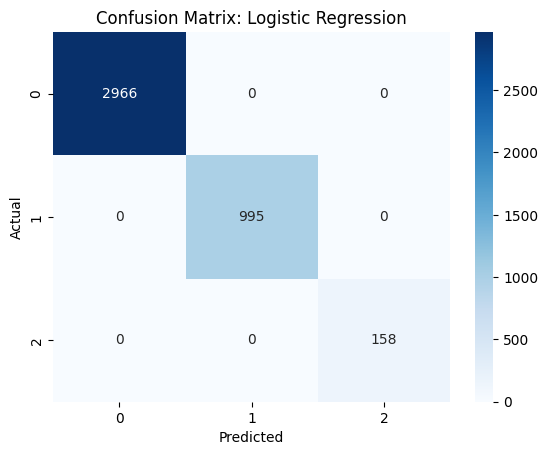

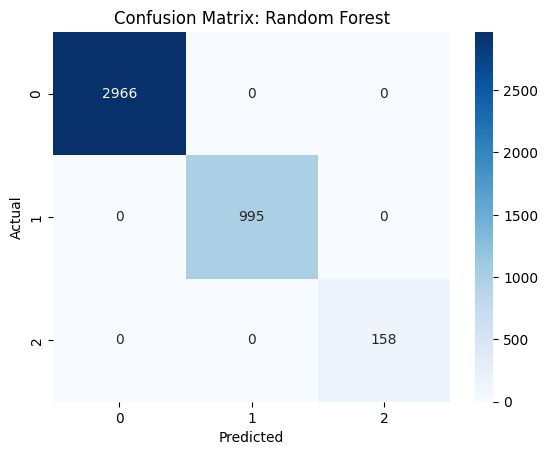

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Kedua model menunjukkan performa yang identik dan sempurna pada dataset uji.
Namun, akurasi 100% ini perlu diperiksa lebih lanjut, mengingat beberapa potensi masalah seperti data leakage, overfitting, atau correlation tinggi antara fitur dan label. Sebaiknya model dievaluasi kembali dengan metode cross-validation dan diuji pada dataset baru untuk memastikan generalisasi performa.

In [9]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy for Logistic Regression:", logreg_scores)
print("Mean Accuracy:", logreg_scores.mean())

# Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy for Random Forest:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Cross-Validation Accuracy for Logistic Regression: [1.         0.99975722 1.         1.         0.99975716]
Mean Accuracy: 0.9999028772597072
Cross-Validation Accuracy for Random Forest: [1.         0.99975722 1.         1.         0.99975716]
Mean Accuracy: 0.9999028772597072


Hasil cross-validation menunjukkan bahwa kedua model, Logistic Regression dan Random Forest, memiliki akurasi yang sangat tinggi pada setiap fold, dengan rata-rata akurasi (mean accuracy) sebesar 99.99%.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Cross-Validation**

1. Konsistensi Model
Cross-validation dengan 5 fold menghasilkan nilai akurasi yang sangat konsisten di semua fold, dengan sedikit perbedaan hanya pada urutan desimal ke-5. Ini menunjukkan bahwa kedua model mampu menggeneralisasi dengan sangat baik pada dataset ini.

2. Kemungkinan Overfitting
Akurasi yang mendekati sempurna, baik pada laporan awal maupun cross-validation, menandakan kemungkinan overfitting, terutama jika dataset memiliki distribusi kelas yang tidak seimbang. Model mungkin hanya "menghafal" pola pada data dominan (label 0), tanpa benar-benar belajar fitur yang membedakan label lain (label 1 dan 2).

3. Imbalance Dataset Effect
Dataset yang tidak seimbang dapat menyebabkan model tampak berkinerja sempurna secara keseluruhan, karena model dapat fokus pada kelas mayoritas (label 0). Hal ini terlihat pada metrik akurasi yang tinggi, tetapi tidak selalu mencerminkan performa pada label minoritas.

**Rekomendasi untuk Tindakan Selanjutnya**

1. Mengattasi Ketidakseimbangan Data
Jika ditemukan bias terhadap kelas mayoritas, lakukan langkah berikut:

- Oversampling kelas minoritas menggunakan metode seperti SMOTE (Synthetic Minority Oversampling Technique).
- Undersampling kelas mayoritas untuk mengurangi bias, jika jumlah data memungkinkan.
- Gunakan metode class weights pada model Logistic Regression dan Random Forest untuk memberikan bobot lebih besar pada kelas minoritas.

2. Analisis Fitur Lebih Lanjut
Lakukan analisis untuk memastikan fitur yang digunakan benar-benar relevan dengan target prediksi. Pertimbangkan penggunaan metode seperti Recursive Feature Elimination (RFE) atau SHAP (SHapley Additive exPlanations) untuk memahami kontribusi fitur.